# Lista de Exercício 01 - Modelagem e Simulação

> Guilherme Alves Carvalho - 11921BCC016

initialize + utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def experimentMeans(experiment, qnt = 5):
    results = []
    for i in range(qnt):
        results.append(experiment())
    return np.mean(results)

## Exercício 1

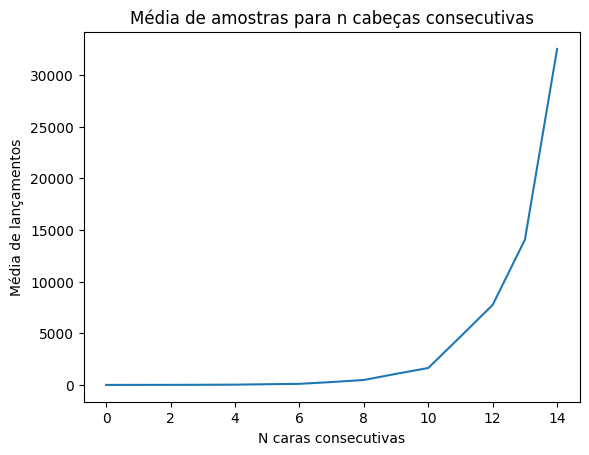

In [4]:
def nFollowingHeads(n):
    consecutiveNs = 0

    samplesDone = 0
    while consecutiveNs != n:
      sample = np.random.choice(['H', 'T'])

      if sample == 'H':
        consecutiveNs += 1
      else:
        consecutiveNs = 0
      samplesDone += 1
        
    return samplesDone
  
n = 15
results = []

for i in range(n):
   results.append(
      experimentMeans(lambda: nFollowingHeads(i), 50)
   )

plt.axes().set(xlabel='N caras consecutivas', ylabel='Média de lançamentos', title='Média de amostras para n cabeças consecutivas')
plt.plot(results)

## Exercício 2

### Letra A

In [7]:
def experiment():
  samples = []
  for j in range(1000):
    comum = np.random.choice(range(1, 21))
    vantagem = np.random.choice(range(1, 21), 2).max()
    samples.append(comum < vantagem)
  return np.mean(samples)
  
print(experimentMeans(experiment, 100))
# a vantagem é melhor em média 14% que a normal

0.6418200000000001


### Letra B e C

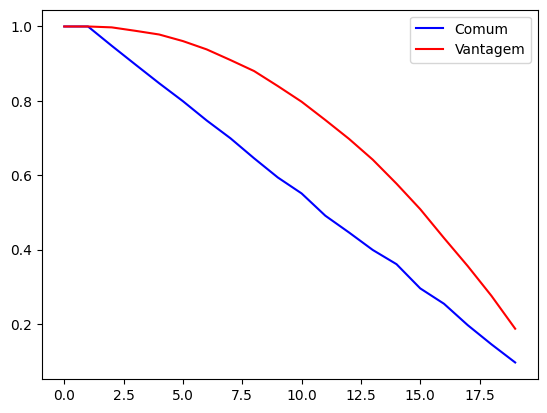

Conforme D aumenta, a importância da vantagem aumenta
e é melhor pois permite um relançamento, o
que aumenta a chance de se obter um número maior.


In [11]:
porcentagensComum = []
porcentagensVantagem = []

for i in range(20):
  samplesComum = []
  samplesVantagem = []

  for j in range(10000):
    comum = np.random.choice(range(1, 21))
    vantagem = np.random.choice(range(1, 21), 2).max()

    samplesComum.append(comum >= i)
    samplesVantagem.append(vantagem >= i)

  porcentagensComum.append(np.mean(samplesComum))
  porcentagensVantagem.append(np.mean(samplesVantagem))

plt.plot(porcentagensComum, label='Comum', color='blue')
plt.plot(porcentagensVantagem, label='Vantagem', color='red')
plt.legend()
plt.show()

# c
print('Conforme D aumenta, a importância da vantagem aumenta\ne é melhor pois permite um relançamento, o\nque aumenta a chance de se obter um número maior.')

## Exercício 3

In [12]:
def experiment(n):
  throws = 1
  sample = np.random.choice(['H', 'T'], n)

  while len(sample) != 0:

    tailsCount = np.count_nonzero(sample == 'T')
    sample = np.random.choice(['H', 'T'], tailsCount)

    throws += 1


  return throws

results = []

for i in range(1, 7000):
  results.append(experimentMeans(lambda: experiment(i)))

print(np.mean(results))

13.66789541363052


## Exercício 4

In [ ]:
??????

## Exercício 5

### Letra A

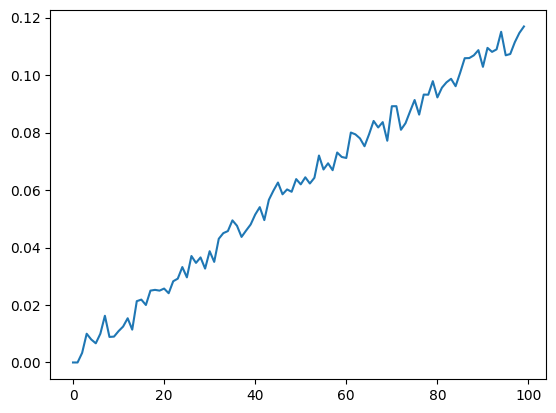

In [15]:
def experiment(n, size = 2):
    nivers = np.array([0 for _ in range(0, 365)])
    
    for _ in range(n):
        nivers[np.random.randint(365)] += 1
    
    return np.count_nonzero(nivers >= size)

results = []
for i in range(1, 101):
    value = experimentMeans(lambda: experiment(i), 100) / i
    results.append(value)

plt.plot(results)

### Letra B

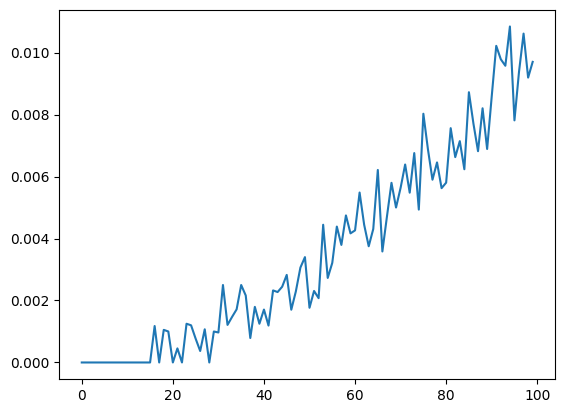

In [18]:
results = []
for i in range(1, 101):
    results.append(experimentMeans(lambda: experiment(i, 3), 100) / i)

plt.plot(results)

## Exercício 6

### Letra A

(array([   8.,   69.,  424., 1248., 2427., 2927., 1864.,  807.,  193.,
          33.]),
 array([7.13 , 7.274, 7.418, 7.562, 7.706, 7.85 , 7.994, 8.138, 8.282,
        8.426, 8.57 ]),
 <BarContainer object of 10 artists>)

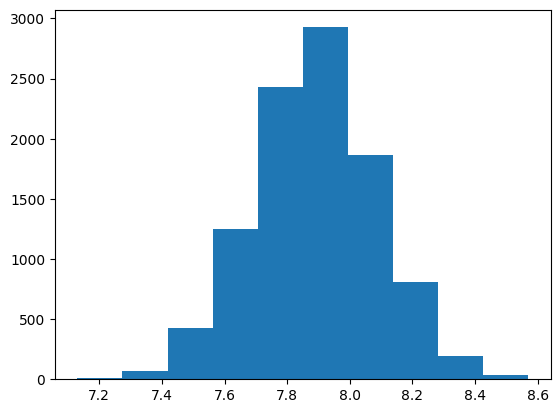

In [34]:
def experiment():
    coordBebado = [0, 0]
    passos = 0
    while np.linalg.norm(coordBebado) <= 5:
      deslocamento = [np.random.randint(-1, 1), np.random.randint(-1, 1)]
      coordBebado[0] += deslocamento[0]
      coordBebado[1] += deslocamento[1]

      passos += 1

    return passos

results = []
for _ in range(10000):   
  results.append(experimentMeans(experiment, 100))

plt.hist(results)
    

### Letra B

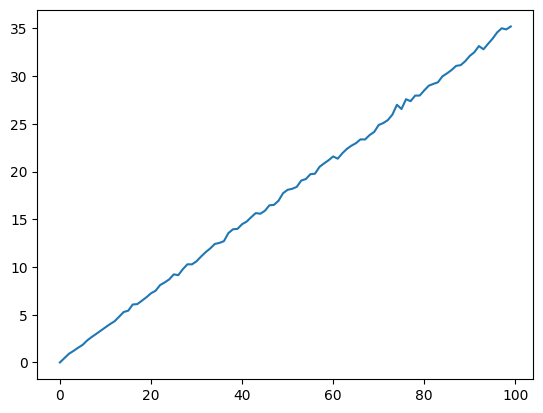

In [36]:
def experiment(maxSteps = 100):
    coordBebado = [0, 0]

    steps = [0]
    for _ in range(maxSteps):
      deslocamento = [np.random.randint(-1, 1), np.random.randint(-1, 1)]
      coordBebado[0] += deslocamento[0]
      coordBebado[1] += deslocamento[1]

      steps.append(np.linalg.norm(coordBebado))

    return steps

results = []
for i in range(100):   
  results.append(experimentMeans(lambda: experiment(i), 100))

plt.plot(results)

### Exercício 7